___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***.

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method.

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [758]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [759]:
df = pd.read_csv("Ready_to_ML.csv")

In [760]:
df.head()

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 160,Mercedes-Benz,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.000,Compact,Used,Yes,120200.000,Manual,Diesel,Dealer,1595.000,5.000,98.000,Front,Alloy wheels,1270.000,No,Cloth,2.000,efficient,6.000,75.000,3.800,Standard,Standard,Safety Premium Package
1,Mercedes-Benz EQE 350,Mercedes-Benz,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.000,Compact,Pre-registered,Yes,5000.000,Automatic,Electric,Dealer,1.000,1.000,0.000,4WD,"Alloy wheels (21""), Shift paddles, Sport packa...",2355.000,No,Part/Full Leather,1.000,efficient,0.000,215.000,2.359,Premium,Plus,Safety Premium Package
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.000,Compact,Used,Yes,18900.000,Automatic,Benzine,Dealer,1991.000,8.000,162.000,4WD,Alloy wheels,1555.000,No,Part/Full Leather,2.000,unefficient,2.000,310.000,8.400,Standard,Standard,Safety Premium Plus Package
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.000,Compact,Used,Yes,18995.000,Automatic,Benzine,Dealer,1991.000,7.000,169.000,4WD,Sport seats,1455.000,No,Part/Full Leather,2.000,unefficient,2.000,225.000,7.300,Standard,Standard,Safety Premium Package
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.000,Compact,Used,Yes,197000.000,Automatic,Diesel,Dealer,2143.000,7.000,162.000,4WD,Alloy wheels,1545.000,No,Part/Full Leather,2.000,unefficient,7.000,100.000,4.900,Standard,Standard,Safety Premium Plus Package


In [761]:
df.shape

(26711, 27)

In [762]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26711 entries, 0 to 26710
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     26711 non-null  object 
 1   make                           26711 non-null  object 
 2   location                       26711 non-null  object 
 3   price                          26711 non-null  float64
 4   body_type                      26711 non-null  object 
 5   type                           26711 non-null  object 
 6   warranty                       26711 non-null  object 
 7   mileage                        26711 non-null  float64
 8   gearbox                        26711 non-null  object 
 9   fuel_type                      26711 non-null  object 
 10  seller                         26711 non-null  object 
 11  engine_size                    26711 non-null  float64
 12  gears                          26711 non-null 

In [763]:
df.describe()

,price,mileage,engine_size,gears,co_emissions,empty_weight,previous_owner,age,power_kW,cons_avg
count,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000,26711.000
mean,23537.241,68863.812,1708.965,5.820,129.526,1425.205,1.460,5.166,118.414,5.532
std,20811.986,62794.146,772.440,1.417,54.255,307.387,0.853,4.655,65.642,2.220
min,490.000,0.000,0.000,1.000,0.000,347.000,1.000,0.000,33.000,0.000
25%,12490.000,19155.000,1248.000,5.000,105.000,1228.000,1.000,2.000,80.000,4.300
50%,18440.000,54000.000,1595.000,6.000,123.000,1375.000,1.000,4.000,100.000,5.200
75%,28330.000,100675.000,1969.000,6.000,150.000,1597.000,2.000,7.000,135.000,6.400
max,549000.000,667128.000,6300.000,8.000,399.000,3150.000,9.000,20.000,450.000,18.300


In [764]:
df.duplicated().sum()

1815

In [765]:
df.drop_duplicates(inplace=True)

In [766]:
df.duplicated().sum()

0

In [767]:
make_model_count=df.make_model.value_counts()
make_model_count

make_model
Renault Megane            825
SEAT Leon                 757
Dacia Sandero             721
Hyundai i30               699
Opel Astra                634
                         ... 
Mercedes-Benz S 65 AMG      1
Mercedes-Benz CLK 320       1
Toyota GR86                 1
Toyota Tacoma               1
Renault R 11                1
Name: count, Length: 490, dtype: int64

In [768]:
drop_model = make_model_count[make_model_count <= 100].index
drop_model

Index(['Hyundai i10', 'Peugeot 307', 'Fiat 124 Spider', 'Renault Twingo',
       'Fiat 500L', 'Opel Crossland X', 'Renault ZOE', 'Renault Laguna',
       'Mercedes-Benz A 200', 'Skoda Kamiq',
       ...
       'Mercedes-Benz ML 300', 'Dacia Break', 'Toyota Tundra',
       'Mercedes-Benz E 50 AMG', 'Mercedes-Benz CLS 300',
       'Mercedes-Benz S 65 AMG', 'Mercedes-Benz CLK 320', 'Toyota GR86',
       'Toyota Tacoma', 'Renault R 11'],
      dtype='object', name='make_model', length=420)

In [769]:
for i in drop_model:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)
    
df.reset_index(drop=True, inplace=True)

In [770]:
df.make_model.value_counts()

make_model
Renault Megane    825
SEAT Leon         757
Dacia Sandero     721
Hyundai i30       699
Opel Astra        634
                 ... 
Toyota RAV 4      107
Volvo XC40        105
Volvo V90         104
Hyundai IONIQ     103
Nissan Juke       101
Name: count, Length: 70, dtype: int64

In [771]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18197 entries, 0 to 18196
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     18197 non-null  object 
 1   make                           18197 non-null  object 
 2   location                       18197 non-null  object 
 3   price                          18197 non-null  float64
 4   body_type                      18197 non-null  object 
 5   type                           18197 non-null  object 
 6   warranty                       18197 non-null  object 
 7   mileage                        18197 non-null  float64
 8   gearbox                        18197 non-null  object 
 9   fuel_type                      18197 non-null  object 
 10  seller                         18197 non-null  object 
 11  engine_size                    18197 non-null  float64
 12  gears                          18197 non-null 

In [772]:
df.corr(numeric_only=True)

,price,mileage,engine_size,gears,co_emissions,empty_weight,previous_owner,age,power_kW,cons_avg
price,1.000,-0.513,0.473,0.298,0.155,0.588,-0.256,-0.526,0.687,0.165
mileage,-0.513,1.000,0.097,-0.075,0.143,0.012,0.360,0.743,-0.096,0.111
engine_size,0.473,0.097,1.000,0.105,0.623,0.570,0.062,0.180,0.805,0.627
gears,0.298,-0.075,0.105,1.000,0.106,0.375,-0.070,-0.127,0.275,0.083
co_emissions,0.155,0.143,0.623,0.106,1.000,0.306,0.117,0.331,0.515,0.805
empty_weight,0.588,0.012,0.570,0.375,0.306,1.000,-0.038,-0.037,0.677,0.266
previous_owner,-0.256,0.360,0.062,-0.070,0.117,-0.038,1.000,0.447,-0.022,0.118
age,-0.526,0.743,0.180,-0.127,0.331,-0.037,0.447,1.000,-0.033,0.337
power_kW,0.687,-0.096,0.805,0.275,0.515,0.677,-0.022,-0.033,1.000,0.554
cons_avg,0.165,0.111,0.627,0.083,0.805,0.266,0.118,0.337,0.554,1.000


## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal.

In [773]:
df["extras"]

0        Alloy wheels, Automatically dimming interior m...
1        Alloy wheels, Automatically dimming interior m...
2                                              Sport seats
3                                              Sport seats
4                                              Sport seats
                               ...                        
18192    All season tyres, Ambient lighting, Cargo barr...
18193                                         Alloy wheels
18194                                         Alloy wheels
18195    Alloy wheels, Automatically dimming interior m...
18196    Alloy wheels (18"), Automatically dimming inte...
Name: extras, Length: 18197, dtype: object

In [774]:
df.extras.str.count(",").add(1)

0        5
1        6
2        1
3        1
4        1
        ..
18192    9
18193    1
18194    1
18195    3
18196    2
Name: extras, Length: 18197, dtype: int64

In [775]:
df["extras"].apply(lambda x: x.count(",")).add(1)

0        5
1        6
2        1
3        1
4        1
        ..
18192    9
18193    1
18194    1
18195    3
18196    2
Name: extras, Length: 18197, dtype: int64

### Converting the Extras feature from object to numeric

In [776]:
df["extras"] = df["extras"].apply(lambda x: x.count(",")).add(1)

In [777]:
df.head()

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Mercedes-Benz,"Bestel gemakkelijk Online 24/7, 1000 Brussel, BE",24400.000,Compact,Used,Yes,27150.000,Manual,Diesel,Dealer,1461.000,6.000,120.000,Front,5,1330.000,No,Part/Full Leather,2.000,unefficient,2.000,85.000,4.500,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,Mercedes-Benz,"Zaackoer Weg 34, 15926 Luckau, DE",7450.000,Compact,Used,No,157500.000,Manual,Diesel,Dealer,1991.000,6.000,138.000,Front,6,1295.000,Yes,Cloth,2.000,unefficient,12.000,80.000,5.200,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,Mercedes-Benz,"Calle Carbón 19, 29603 MALAGA, ES",29800.000,Compact,Used,Yes,21734.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1445.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,Mercedes-Benz,"RUA REAL 60, 36860 PONTEAEREAS, ES",21000.000,Compact,Used,Yes,172700.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1425.000,No,Cloth,3.000,unefficient,4.000,80.000,3.700,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,Mercedes-Benz,"Canal de Sant Jordi nº17 Pol. Ind. Son oms, 0...",26800.000,Compact,Used,Yes,18989.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1455.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package


In [778]:
df.drop(columns=["make", "location"], inplace=True)

# make_model feature already gives us insight about make feature so we drop make feature.
# We are dropping the location feature because we don't think it will have an effect on prices.

## multicollinearity control

In [779]:
def color_red(val):

    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

# This function will return the correlation between independent features coloured based on their correlation strength.
# If the correlation is between (-0.90, +0.90), the value will be coloured red, otherwise black.

# Linear models (linear regression, ridge, lasso, elasticnet, logistic regression) are badly affected by multicollinearity.
# Regularisation models handle this problem gracefully as well as the overfitting situation.

In [780]:
df.corr(numeric_only=True).style.applymap(color_red)

,price,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
price,1.000000,-0.512806,0.472763,0.298219,0.154896,0.326470,0.588013,-0.256245,-0.525858,0.687179,0.164896
mileage,-0.512806,1.000000,0.096988,-0.075386,0.142708,-0.176425,0.011683,0.359637,0.742675,-0.096395,0.111174
engine_size,0.472763,0.096988,1.000000,0.104819,0.623381,0.150075,0.570256,0.062210,0.179708,0.804989,0.627165
gears,0.298219,-0.075386,0.104819,1.000000,0.105622,0.188638,0.375265,-0.069685,-0.127089,0.274800,0.082923
co_emissions,0.154896,0.142708,0.623381,0.105622,1.000000,0.066954,0.305501,0.116515,0.331054,0.515299,0.804786
extras,0.326470,-0.176425,0.150075,0.188638,0.066954,1.000000,0.323238,-0.092745,-0.181164,0.282883,0.087471
empty_weight,0.588013,0.011683,0.570256,0.375265,0.305501,0.323238,1.000000,-0.037641,-0.036816,0.676901,0.265832
previous_owner,-0.256245,0.359637,0.062210,-0.069685,0.116515,-0.092745,-0.037641,1.000000,0.446526,-0.021639,0.117748
age,-0.525858,0.742675,0.179708,-0.127089,0.331054,-0.181164,-0.036816,0.446526,1.000000,-0.032599,0.336580
power_kW,0.687179,-0.096395,0.804989,0.274800,0.515299,0.282883,0.676901,-0.021639,-0.032599,1.000000,0.553695


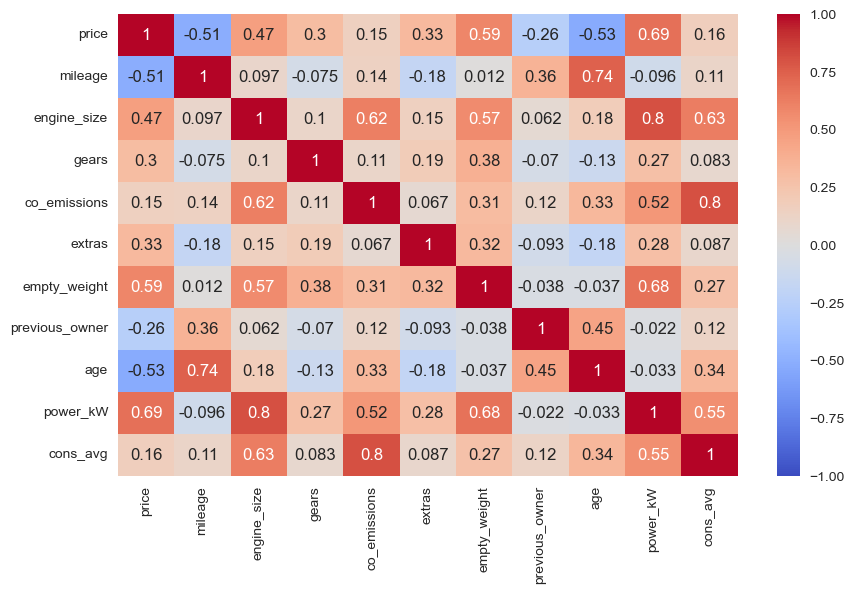

In [781]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show();

In [782]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [783]:
df_numeric = df.select_dtypes(include ="number")
df_predictors = df_numeric.drop(columns='price')

In [784]:
predictors = df_predictors.columns
predictors

Index(['mileage', 'engine_size', 'gears', 'co_emissions', 'extras',
       'empty_weight', 'previous_owner', 'age', 'power_kW', 'cons_avg'],
      dtype='object')

In [785]:
vif_data = pd.DataFrame()
vif_data['Variable'] = predictors

In [786]:
# Calculate VIF scores for each predictor
vif_data["VIF"] = [variance_inflation_factor(df[predictors].values, i) for i in range(len(predictors))]

In [787]:
vif_data
# check the VIF scores:
# 1   -> no correlation
# 1-5 -> ok
# >5  -> Alert! Be cautious and inspect more. Consider removing.
# >10 -> Severe multicolliniearity!!!

,Variable,VIF
0,mileage,5.471
1,engine_size,25.196
2,gears,21.675
3,co_emissions,23.505
4,extras,2.781
5,empty_weight,38.758
6,previous_owner,4.799
7,age,6.880
8,power_kW,17.868
9,cons_avg,24.706


## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [788]:
from sklearn.model_selection import train_test_split

In [789]:
X = df.drop(columns="price", axis=1)
y = df["price"]

In [790]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [791]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (14557, 24)
Train target shape   :  (14557,)
Test features shape  :  (3640, 24)
Test target shape    :  (3640,)


## OneHotEncoder and OrdinalEncoder

### Converting Object Features into Numerical Features Using Make Column Transformer with OrdinalEncoder and OneHotEncoder

In [792]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer

In [793]:
df.select_dtypes(include="object").head(1)

,make_model,body_type,type,warranty,gearbox,fuel_type,seller,drivetrain,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Compact,Used,Yes,Manual,Diesel,Dealer,Front,No,Part/Full Leather,unefficient,Standard,Plus,Safety Premium Package


In [794]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

make_model                    : ['Mercedes-Benz A 180' 'Opel Corsa' 'Opel Astra' 'Opel Adam'
 'Opel Insignia' 'Opel Cascada' 'Opel Grandland X' 'Renault Megane'
 'Renault Clio' 'Renault Captur' 'Renault Talisman' 'Renault Kadjar'
 'Peugeot 308' 'Peugeot 206' 'Peugeot 208' 'Peugeot 207' 'Peugeot 3008'
 'Peugeot 508' 'Peugeot RCZ' 'Peugeot 2008' 'Fiat 500' 'Fiat Tipo'
 'Fiat 500X' 'Fiat Panda' 'Fiat 500C' 'SEAT Leon' 'SEAT Ibiza'
 'SEAT Arona' 'SEAT Ateca' 'Skoda Octavia' 'Skoda Scala' 'Skoda Fabia'
 'Skoda Superb' 'Skoda Kodiaq' 'Skoda Karoq' 'Dacia Sandero' 'Dacia Logan'
 'Dacia Duster' 'Toyota Yaris' 'Toyota Aygo' 'Toyota Corolla'
 'Toyota Auris' 'Toyota C-HR' 'Toyota RAV 4' 'Nissan Micra'
 'Nissan Qashqai' 'Nissan Juke' 'Nissan Pulsar' 'Nissan 370Z'
 'Nissan 350Z' 'Nissan X-Trail' 'Ford Fiesta' 'Ford Focus' 'Ford Mondeo'
 'Ford Kuga' 'Ford Mustang' 'Hyundai i30' 'Hyundai i20' 'Hyundai IONIQ'
 'Hyundai TUCSON' 'Volvo V40' 'Volvo S60' 'Volvo XC60' 'Volvo C30'
 'Volvo C70' 'Volvo XC90' 

In [795]:
cat_onehot  = ['make_model', 'body_type', 'gearbox', 'fuel_type', 'drivetrain']

cat_ordinal = ['type', 'warranty', 'seller', 'full_service_history', 'upholstery', 'energy_efficiency_class', 'comfort_&_convenience_Package',
               'entertainment_&_media_Package', 'safety_&_security_Package']
    
cat_for_type=["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_warranty=["No", "Yes"]
cat_for_seller=['Dealer', 'Private seller']
cat_for_service_history=["No", "Yes"]
cat_for_upholstery=['Cloth','Part/Full Leather']
cat_for_energy=['unefficient', 'efficient']
cat_for_comfort=['Standard', 'Premium', 'Premium Plus']
cat_for_ent=['Standard', 'Plus']
cat_for_safety=['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [796]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", 
                                       sparse_output=False), cat_onehot), 
                        (OrdinalEncoder(handle_unknown="use_encoded_value",
                                        unknown_value=-1,
                                        categories=[cat_for_type, 
                                                    cat_for_warranty,
                                                    cat_for_seller,
                                                    cat_for_service_history,
                                                    cat_for_upholstery,
                                                    cat_for_energy,
                                                    cat_for_comfort, 
                                                    cat_for_ent, 
                                                    cat_for_safety]), cat_ordinal),
                         remainder='passthrough', 
                         verbose_feature_names_out=False) 

column_trans=column_trans.set_output(transform="pandas")

In [797]:
column_trans.fit_transform(X_train)

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,...,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota RAV 4,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,type,warranty,seller,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
16734,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,98027.000,1560.000,6.000,89.000,1,1472.000,3.000,7.000,84.000,3.900
14781,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,17195.000,1995.000,8.000,136.000,7,1826.000,1.000,1.000,140.000,5.200
2414,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,225000.000,1998.000,6.000,178.000,6,1395.000,1.000,13.000,132.000,7.600
1430,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.

In [798]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)

In [799]:
X_train_trans.shape, X_test_trans.shape

((14557, 105), (3640, 105))

In [800]:
X_train_trans.head()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,...,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota RAV 4,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,type,warranty,seller,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
16734,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,98027.000,1560.000,6.000,89.000,1,1472.000,3.000,7.000,84.000,3.900
14781,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,17195.000,1995.000,8.000,136.000,7,1826.000,1.000,1.000,140.000,5.200
2414,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,225000.000,1998.000,6.000,178.000,6,1395.000,1.000,13.000,132.000,7.600
1430,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.

In [801]:
X_test_trans.head()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,...,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota RAV 4,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,type,warranty,seller,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
15071,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,27532.000,1500.000,6.000,109.000,8,1280.000,1.000,2.000,88.000,3.600
10999,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,31167.000,998.000,5.000,93.000,4,985.000,1.000,2.000,53.000,4.000
14000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,1.000,33800.000,5083.000,6.000,273.000,9,1893.000,1.000,4.000,310.000,12.500
15766,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00

## Scaling

In [802]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [803]:
scaler = MinMaxScaler().set_output(transform="pandas")
X_train_scaled = scaler.fit_transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

In [804]:
X_train_scaled

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,...,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota RAV 4,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,type,warranty,seller,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
16734,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.500,0.163,0.268,0.714,0.223,0.000,0.371,0.250,0.350,0.109,0.213
14781,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,0.500,1.000,0.500,0.029,0.343,1.000,0.341,0.316,0.545,0.000,0.050,0.258,0.284
2414,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.500,0.375,0.344,0.714,0.446,0.263,0.333,0.000,0.650,0.237,0.415
1430,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.

In [805]:
X_test_scaled

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,...,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota RAV 4,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,type,warranty,seller,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
15071,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.500,1.000,0.500,0.046,0.258,0.714,0.273,0.368,0.276,0.000,0.100,0.120,0.197
10999,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.500,0.052,0.172,0.571,0.233,0.158,0.131,0.000,0.100,0.027,0.219
14000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,0.500,0.056,0.875,0.714,0.684,0.421,0.578,0.000,0.200,0.710,0.683
15766,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [806]:
# Pre-defined functions

def train_val(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided.

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)

def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


In [807]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error

lm = LinearRegression()

In [808]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [809]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [810]:
pd.options.display.float_format = '{:.3f}'.format

train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.832,0.831
mae,2852.928,2818.107
mse,27088471.320,24542818.386
rmse,5204.659,4954.071


In [811]:
print("test adj_R2 score  :", adj_r2(y_test, y_pred, X_test_scaled))
print("train adj_R2 score :", adj_r2(y_train, y_train_pred, X_train_scaled))

test adj_R2 score  : 0.8255795728102246
train adj_R2 score : 0.8302835419973396


## Cross Validate

In [812]:
from sklearn.model_selection import cross_validate, cross_val_score

In [813]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'], cv = 10, return_train_score=True)


# Creating a brand new model for cross validation.

# Set return_train_score=True to get the train score results of cross validation as well.

In [814]:
scores
# The scores are returned as a dictionary.

{'fit_time': array([0.28093052, 0.16145372, 0.15623713, 0.15624142, 0.15624118,
        0.23151684, 0.14787221, 0.14062929, 0.14063716, 0.15624452]),
 'score_time': array([0.01771736, 0.01560974, 0.01563406, 0.01563525, 0.        ,
        0.03125334, 0.01560569, 0.01560998, 0.01560426, 0.        ]),
 'test_r2': array([0.86352062, 0.85100482, 0.84039106, 0.84603476, 0.84456829,
        0.83113826, 0.79095939, 0.84833271, 0.79006285, 0.80908067]),
 'train_r2': array([0.82761298, 0.8295049 , 0.83044666, 0.82992907, 0.83003271,
        0.83142909, 0.83655876, 0.82977006, 0.83738734, 0.83387825]),
 'test_neg_mean_absolute_error': array([-2989.90384615, -2771.16758242, -2873.75549451, -2795.19093407,
        -2800.12843407, -2851.31456044, -3016.94823146, -2706.61030928,
        -3012.78556701, -2919.06872852]),
 'train_neg_mean_absolute_error': array([-2840.53369972, -2878.3837875 , -2867.60674758, -2865.60109915,
        -2863.05373636, -2852.35798794, -2826.4394321 , -2876.00427416,
    

In [815]:
pd.DataFrame(scores, index = range(1,11))
# To make it easier to read, we turn the returned dictionary into a dataframe.

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.281,0.018,0.864,0.828,-2989.904,-2840.534,-22990302.516,-27564633.333,-4794.820,-5250.203,-0.217,-0.201
2,0.161,0.016,0.851,0.830,-2771.168,-2878.384,-19949155.273,-27917822.269,-4466.448,-5283.732,-0.201,-0.204
3,0.156,0.016,0.840,0.830,-2873.755,-2867.607,-23176002.478,-27551545.770,-4814.146,-5248.957,-0.216,-0.201
4,0.156,0.016,0.846,0.830,-2795.191,-2865.601,-22196356.641,-27654558.231,-4711.301,-5258.760,-0.200,-0.203
5,0.156,0.000,0.845,0.830,-2800.128,-2863.054,-22860783.141,-27583469.044,-4781.295,-5251.997,-0.198,-0.203
6,0.232,0.031,0.831,0.831,-2851.315,-2852.358,-29423515.927,-26847302.800,-5424.345,-5181.438,-0.207,-0.201
7,0.148,0.016,0.791,0.837,-3016.948,-2826.439,-38270744.926,-25869711.367,-6186.335,-5086.228,-0.209,-0.200
8,0.141,0.016,0.848,0.830,-2706.610,-2876.004,-21101117.107,-27768857.516,-4593.595,-5269.616,-0.198,-0.202
9,0.141,0.016,0.790,0.837,-3012.786,-2820.095,-43566278.795,-25295120.447,-6600.476,-5029.425,-0.199,-0.201
10,0.156,0.000,0.809,0.834,-2919.069,-2840.549,-31270930.042,-26650248.037,-5592.042,-5162.388,-0.188,-0.203


In [816]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

# Return the mean of the metrics we got from cross validation.

test_r2                                            0.832
train_r2                                           0.832
test_neg_mean_absolute_error                   -2873.687
train_neg_mean_absolute_error                  -2853.062
test_neg_mean_squared_error                -27480518.685
train_neg_mean_squared_error               -27070326.881
test_neg_root_mean_squared_error               -5196.480
train_neg_root_mean_squared_error              -5202.274
test_neg_mean_absolute_percentage_error           -0.203
train_neg_mean_absolute_percentage_error          -0.202
dtype: float64

In [817]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.832,0.831
mae,2852.928,2818.107
mse,27088471.320,24542818.386
rmse,5204.659,4954.071


## Prediction Error

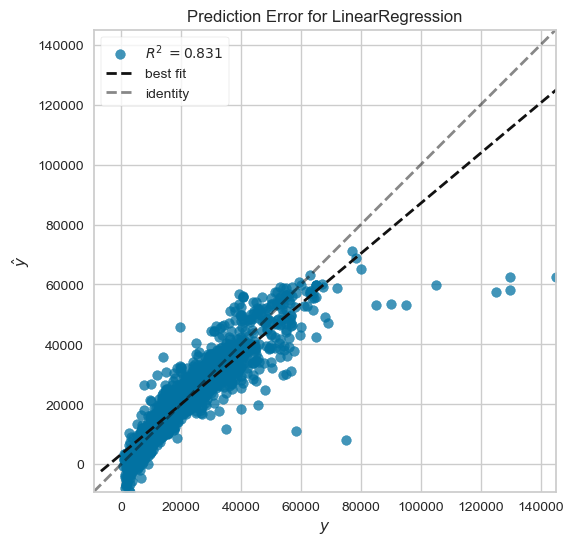

In [818]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

## Residual Plot

In [819]:
residuals = y_test-y_pred

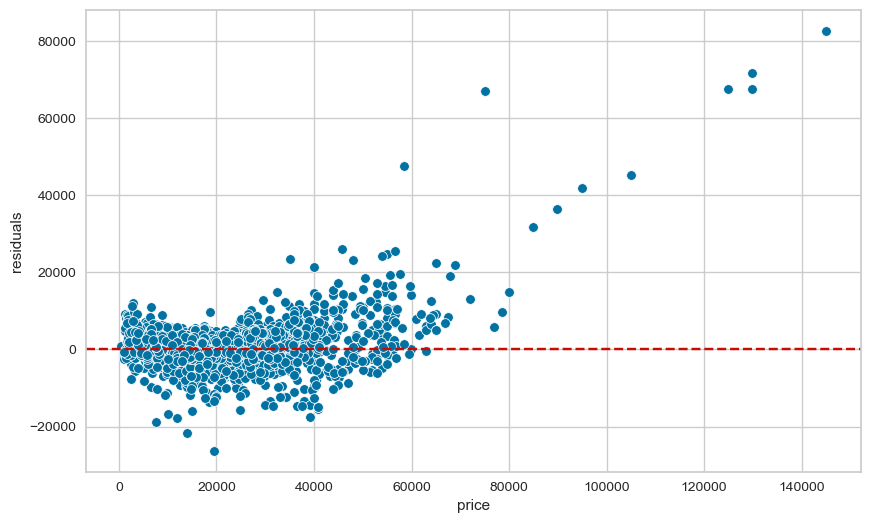

In [820]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show();

# There are 2 very fundamental and important assumptions we make on our residuals:
# 1- They are normally distributed.
# 2- They are randomly spread around the mean of 0. (This phenomenon is called homoscedasticity)

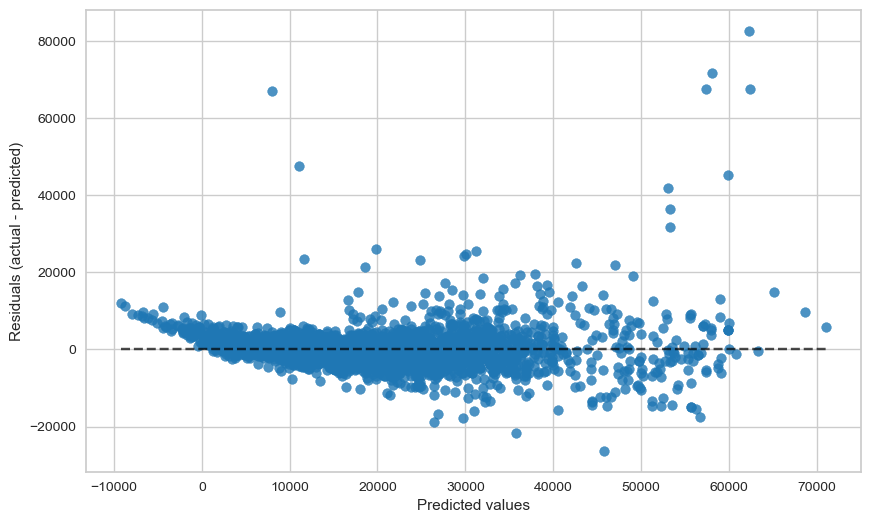

In [821]:
from sklearn.metrics import PredictionErrorDisplay
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()
plt.show()

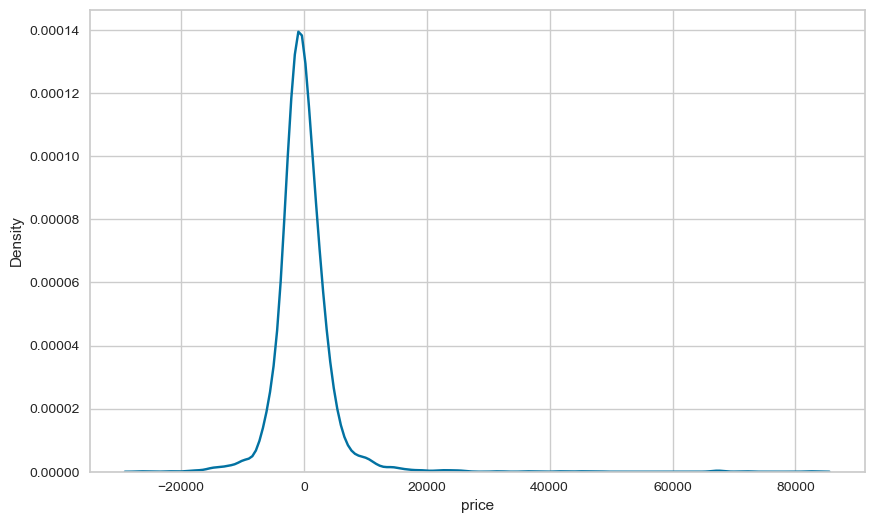

In [822]:
sns.kdeplot(residuals)
plt.show();

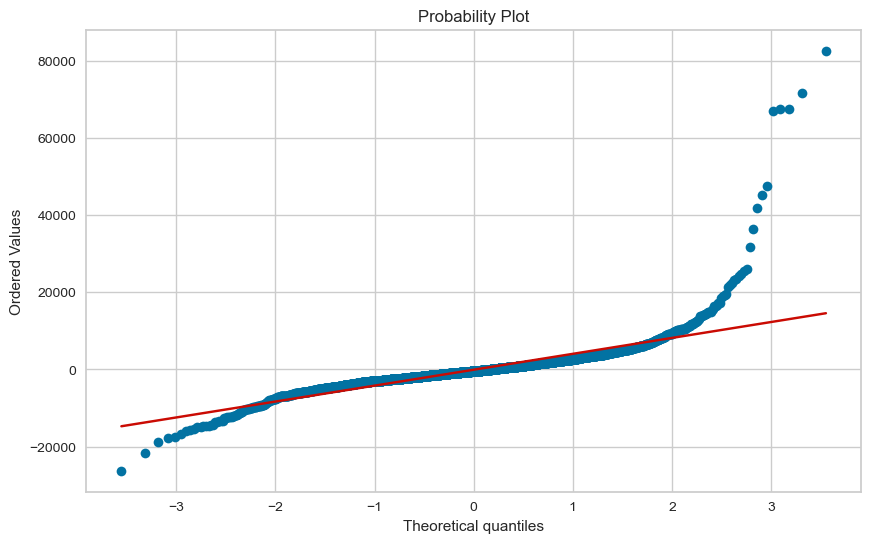

In [823]:
import scipy.stats as stats

stats.probplot(residuals, dist ="norm", plot =plt)
plt.show();

# You can also check QQ-normality plot to check if residuals are normally distributed.

In [824]:
from scipy.stats import skew
skew(residuals)

# Check the skewness of the residuals. This is another way of checking your data
# against normality, with a more formal mathematical calculation.
# If your skewness score is between [-1, 1], you could say that it's more or less normally distributed.
# 0 is the perfect score, means perfectly normally distributed, which you'll probably never get.

5.289231295513985

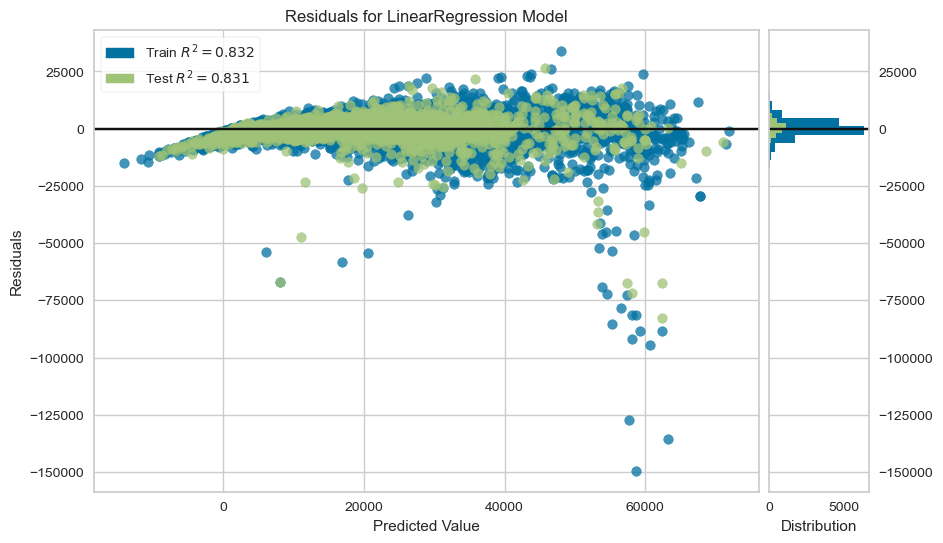

In [825]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

# A much better way of visualising residuals is using `yellowbrick.regressor.ResidualsPlot`
# This saves us manual labour.
# yellowbrick is a great library specifically created to visualise scikit-learn models.

## Dropping outliers that worsen my predictions from the dataset

- After dropping re-fit and evaluate your model

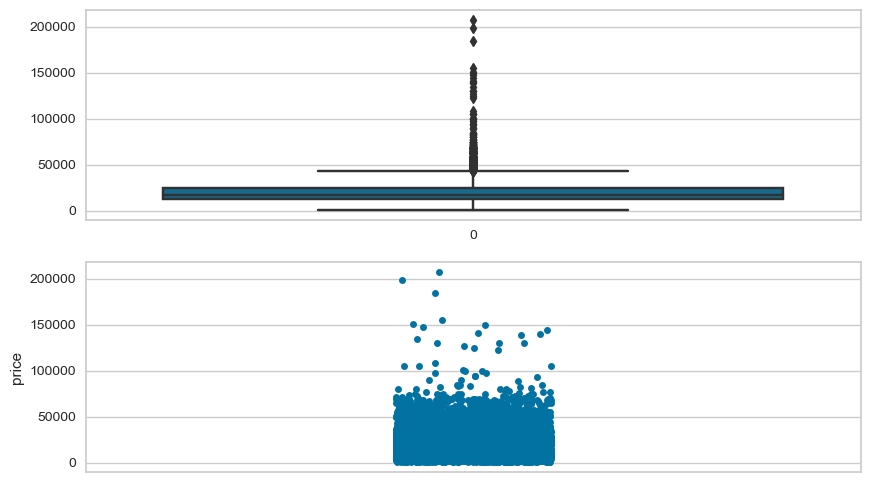

In [826]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(df.price)

plt.subplot(212)
sns.stripplot(df.price)

plt.show()

In [827]:
df = df[df.price <70000]
df

,make_model,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,24400.000,Compact,Used,Yes,27150.000,Manual,Diesel,Dealer,1461.000,6.000,120.000,Front,5,1330.000,No,Part/Full Leather,2.000,unefficient,2.000,85.000,4.500,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,7450.000,Compact,Used,No,157500.000,Manual,Diesel,Dealer,1991.000,6.000,138.000,Front,6,1295.000,Yes,Cloth,2.000,unefficient,12.000,80.000,5.200,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,29800.000,Compact,Used,Yes,21734.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1445.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,21000.000,Compact,Used,Yes,172700.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1425.000,No,Cloth,3.000,unefficient,4.000,80.000,3.700,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,26800.000,Compact,Used,Yes,18989.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1455.000,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18192,Volvo V40,13000.000,Sedan,Used,No,114000.000,Manual,Diesel,Private seller,1969.000,6.000,94.000,Front,9,1532.000,Yes,Cloth,1.000,efficient,4.000,88.000,3.600,Standard,Standard,Safety Premium Package
18193,Volvo S60,4999.000,Sedan,Used,Yes,166512.000,Manual,Benzine,Dealer,2521.000,5.000,145.000,Front,1,1550.000,No,Part/Full Leather,3.000,efficient,18.000,154.000,9.100,Standard,Standard,Safety Premium Package
18194,Volvo S90,37600.000,Sedan,Used,Yes,40345.000,Automatic,Diesel,Dealer,1969.000,8.000,127.000,4WD,1,2077.000,No,Part/Full Leather,2.000,efficient,3.000,288.000,2.000,Standard,Standard,Safety Premium Plus Package
18195,Volvo C30,7300.000,Sedan,Used,Yes,96000.000,Manual,Diesel,Dealer,1560.000,6.000,99.000,Front,3,1356.000,Yes,Cloth,1.000,unefficient,11.000,84.000,3.800,Standard,Standard,Safety Premium Package


In [828]:
X = df.drop(columns = "price")
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [829]:
X_train_trans= column_trans.fit_transform(X_train)
X_test_trans= column_trans.transform(X_test)

In [830]:
scaler = MinMaxScaler().set_output(transform="pandas")

X_train_scaled = scaler.fit_transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

In [831]:
lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train)

LinearRegression()

In [832]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.889,0.886
mae,2583.576,2593.747
mse,14365304.411,14444785.084
rmse,3790.159,3800.630


In [833]:
model = LinearRegression()

scores = cross_validate(model, 
                        X_train_scaled, 
                        y_train, 
                        scoring=['r2', 
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error',
                                'neg_mean_absolute_percentage_error'], 
                        cv =10,
                        return_train_score=True)

pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                            0.887
train_r2                                           0.889
test_neg_mean_absolute_error                   -2604.912
train_neg_mean_absolute_error                  -2582.011
test_neg_mean_squared_error                -14664866.446
train_neg_mean_squared_error               -14342653.995
test_neg_root_mean_squared_error               -3822.689
train_neg_root_mean_squared_error              -3787.079
test_neg_mean_absolute_percentage_error           -0.189
train_neg_mean_absolute_percentage_error          -0.187
dtype: float64

In [834]:
y_pred = lm2.predict(X_test_scaled)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lm_mape= mean_absolute_percentage_error(y_test, y_pred)

C:\Users\Esra\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


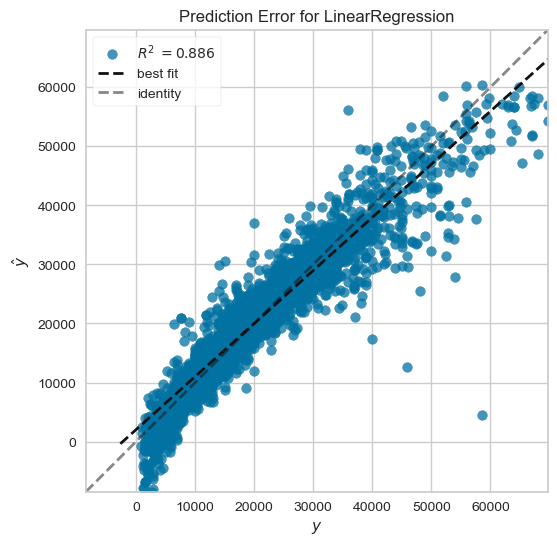

In [835]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

In [836]:
residuals = y_test-y_pred

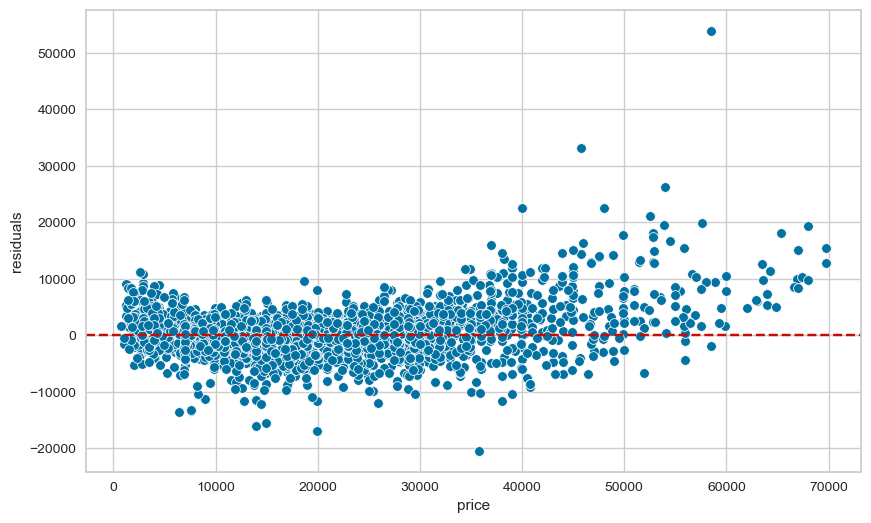

In [837]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show();

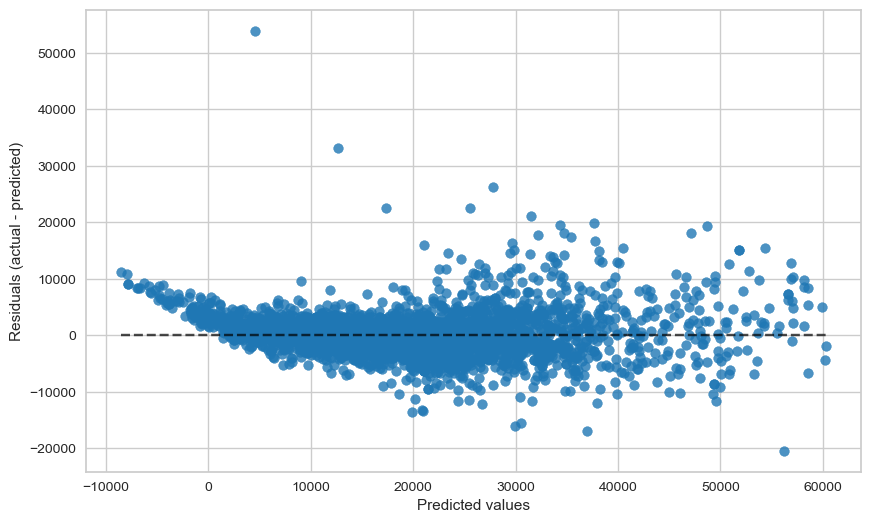

In [838]:
from sklearn.metrics import PredictionErrorDisplay
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()
plt.show()

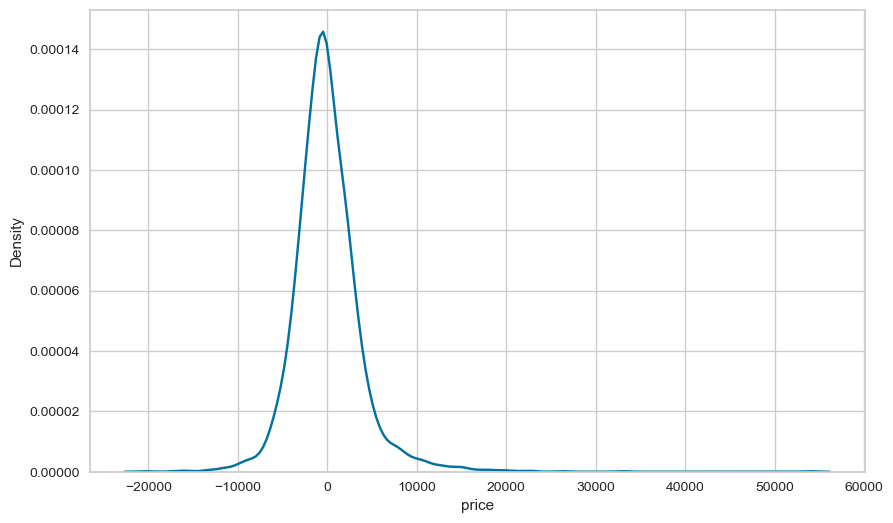

In [839]:
sns.kdeplot(residuals)
plt.show();

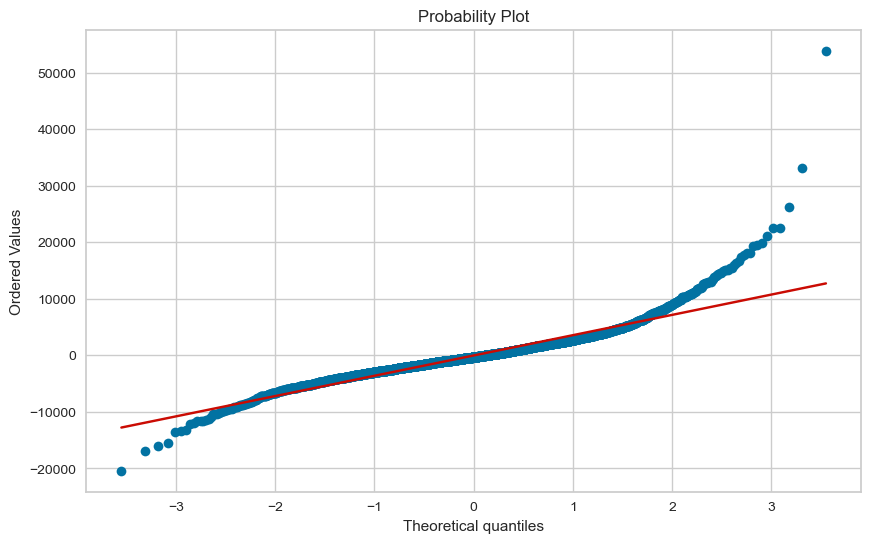

In [840]:
import scipy.stats as stats

stats.probplot(residuals, dist ="norm", plot =plt)
plt.show();

In [841]:
from scipy.stats import skew
skew(residuals)

1.792515834815918

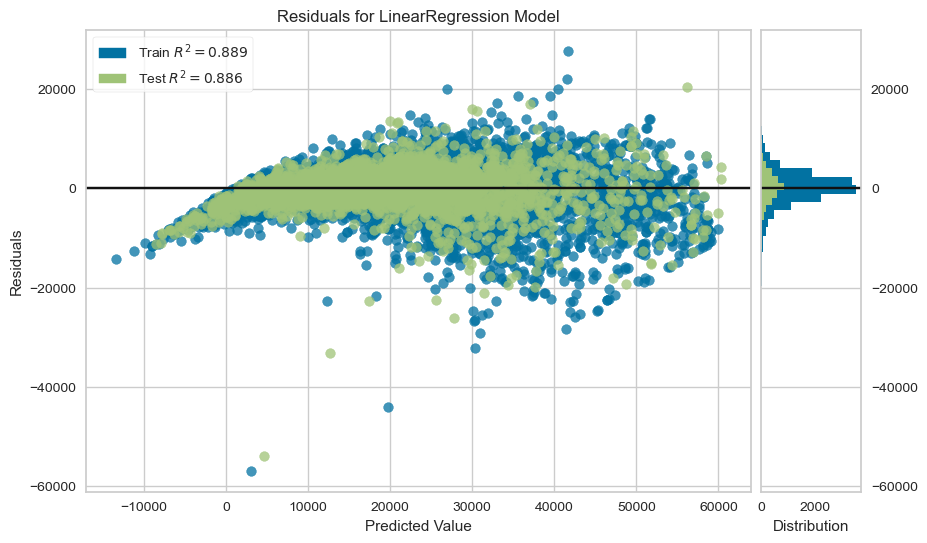

In [842]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

## Pipeline
- Read the documentation and apply pipeline
- link : https://scikit-learn.org/stable/modules/compose.html

In [843]:
X = df.drop(columns = ["price"])
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [844]:
cat_onehot  = ['make_model', 'body_type', 'gearbox', 'fuel_type', 'drivetrain']

cat_ordinal = ['type', 'warranty', 'seller', 'full_service_history', 'upholstery', 'energy_efficiency_class', 'comfort_&_convenience_Package',
               'entertainment_&_media_Package', 'safety_&_security_Package']
    
cat_for_type=["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_warranty=["No", "Yes"]
cat_for_seller=['Dealer', 'Private seller']
cat_for_service_history=["No", "Yes"]
cat_for_upholstery=['Cloth','Part/Full Leather']
cat_for_energy=['unefficient', 'efficient']
cat_for_comfort=['Standard', 'Premium', 'Premium Plus']
cat_for_ent=['Standard', 'Plus']
cat_for_safety=['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [845]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
enc_ordinal = OrdinalEncoder(categories=[cat_for_type,
                                         cat_for_warranty,
                                         cat_for_seller,
                                         cat_for_service_history,
                                         cat_for_upholstery,
                                         cat_for_energy,
                                         cat_for_comfort, 
                                         cat_for_ent, 
                                         cat_for_safety])
                                                    

column_trans = make_column_transformer((enc_onehot, cat_onehot), 
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False) 

In [846]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler",  MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_pipe = Pipeline(steps=operations).set_output(transform="pandas")

ridge_pipe.fit(X_train, y_train)

C:\Users\Esra\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

## 4. Implement Ridge Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True  
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.

## Ridge

In [847]:
from sklearn.linear_model import Ridge

In [848]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)
ridge_model.fit(X_train, y_train)

C:\Users\Esra\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [849]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.889,0.886
mae,2580.329,2590.692
mse,14357947.535,14434857.504
rmse,3789.188,3799.323


## Cross Validation

In [850]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'], 
                        cv=10, 
                        return_train_score=True)

In [851]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.330,0.062,0.890,0.889,-2702.740,-2565.346,-15794297.955,-14218314.479,-3974.204,-3770.718,-0.196,-0.186
2,0.312,0.047,0.884,0.889,-2546.381,-2584.261,-13772609.438,-14438638.439,-3711.147,-3799.821,-0.179,-0.188
3,0.320,0.062,0.893,0.888,-2477.333,-2595.933,-13399912.953,-14476204.191,-3660.589,-3804.761,-0.178,-0.188
4,0.297,0.062,0.890,0.889,-2546.963,-2585.501,-13959872.752,-14423282.170,-3736.291,-3797.800,-0.178,-0.187
5,0.281,0.062,0.888,0.889,-2563.891,-2583.541,-14409883.109,-14365861.286,-3796.035,-3790.232,-0.197,-0.186
6,0.304,0.062,0.896,0.888,-2635.524,-2575.031,-13460615.085,-14472238.365,-3668.871,-3804.240,-0.198,-0.185
7,0.297,0.062,0.853,0.893,-2745.931,-2560.388,-19671284.063,-13803420.070,-4435.232,-3715.295,-0.199,-0.186
8,0.297,0.062,0.893,0.888,-2522.529,-2589.787,-13328664.047,-14486652.466,-3650.844,-3806.134,-0.191,-0.186
9,0.297,0.062,0.889,0.889,-2669.979,-2573.463,-14867742.219,-14318590.163,-3855.871,-3783.991,-0.191,-0.186
10,0.297,0.062,0.890,0.889,-2599.353,-2581.190,-13848959.848,-14429569.602,-3721.419,-3798.627,-0.172,-0.189


In [852]:
scores.iloc[:,2:].mean()

test_r2                                            0.887
train_r2                                           0.889
test_neg_mean_absolute_error                   -2601.062
train_neg_mean_absolute_error                  -2579.444
test_neg_mean_squared_error                -14651384.147
train_neg_mean_squared_error               -14343277.123
test_neg_root_mean_squared_error               -3821.050
train_neg_root_mean_squared_error              -3787.162
test_neg_mean_absolute_percentage_error           -0.188
train_neg_mean_absolute_percentage_error          -0.187
dtype: float64

## Finding best alpha for Ridge

In [853]:
from sklearn.model_selection import GridSearchCV

In [854]:
alpha_space = np.linspace(0.001, 100, 100)
alpha_space

array([1.00000000e-03, 1.01109091e+00, 2.02118182e+00, 3.03127273e+00,
       4.04136364e+00, 5.05145455e+00, 6.06154545e+00, 7.07163636e+00,
       8.08172727e+00, 9.09181818e+00, 1.01019091e+01, 1.11120000e+01,
       1.21220909e+01, 1.31321818e+01, 1.41422727e+01, 1.51523636e+01,
       1.61624545e+01, 1.71725455e+01, 1.81826364e+01, 1.91927273e+01,
       2.02028182e+01, 2.12129091e+01, 2.22230000e+01, 2.32330909e+01,
       2.42431818e+01, 2.52532727e+01, 2.62633636e+01, 2.72734545e+01,
       2.82835455e+01, 2.92936364e+01, 3.03037273e+01, 3.13138182e+01,
       3.23239091e+01, 3.33340000e+01, 3.43440909e+01, 3.53541818e+01,
       3.63642727e+01, 3.73743636e+01, 3.83844545e+01, 3.93945455e+01,
       4.04046364e+01, 4.14147273e+01, 4.24248182e+01, 4.34349091e+01,
       4.44450000e+01, 4.54550909e+01, 4.64651818e+01, 4.74752727e+01,
       4.84853636e+01, 4.94954545e+01, 5.05055455e+01, 5.15156364e+01,
       5.25257273e+01, 5.35358182e+01, 5.45459091e+01, 5.55560000e+01,
      

In [855]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha':alpha_space}  # # Parameter names should be used together with the model name defined
                                           # in the pipeline..

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [856]:
ridge_grid_model.fit(X_train, y_train)

C:\Users\Esra\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'drivetrain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'Demonstratio...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [857]:
ridge_grid_model.best_params_

{'Ridge__alpha': 1.011090909090909}

In [858]:
pd.DataFrame(ridge_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.538,0.025,0.083,0.014,0.001,{'Ridge__alpha': 0.001},-3980.180,-3712.281,-3660.110,-3731.193,-3794.829,-3663.881,-4440.143,-3649.556,-3857.532,-3722.251,-3821.196,228.100,2,-3770.007,-3799.179,-3804.143,-3797.182,-3789.601,-3803.627,-3714.629,-3805.516,-3783.425,-3797.951,-3786.526,26.132
1,0.547,0.040,0.070,0.008,1.011,{'Ridge__alpha': 1.011090909090909},-3974.154,-3711.141,-3660.602,-3736.352,-3796.054,-3668.930,-4435.188,-3650.863,-3855.859,-3721.419,-3821.056,225.714,1,-3770.733,-3799.834,-3804.774,-3797.813,-3790.246,-3804.252,-3715.309,-3806.146,-3784.003,-3798.641,-3787.175,26.116
2,0.525,0.020,0.072,0.010,2.021,{'Ridge__alpha': 2.021181818181818},-3970.721,-3711.140,-3662.308,-3742.152,-3798.192,-3674.580,-4431.888,-3652.906,-3855.205,-3721.990,-3822.108,223.662,3,-3772.550,-3801.507,-3806.374,-3799.427,-3791.896,-3805.855,-3717.053,-3807.766,-3785.468,-3800.406,-3788.830,26.079
3,0.536,0.046,0.075,0.015,3.031,{'Ridge__alpha': 3.0312727272727273},-3968.984,-3711.941,-3664.856,-3748.375,-3800.979,-3680.633,-4429.798,-3655.478,-3855.270,-3723.504,-3823.982,221.850,4,-3775.109,-3803.895,-3808.650,-3801.740,-3794.260,-3808.154,-3719.548,-3810.089,-3787.547,-3802.930,-3791.192,26.027
4,0.531,0.027,0.089,0.024,4.041,{'Ridge__alpha': 4.041363636363637},-3968.439,-3713.333,-3668.018,-3754.887,-3804.244,-3686.969,-4428.629,-3658.448,-3855.868,-3725.691,-3826.453,220.224,5,-3778.203,-3806.810,-3811.419,-3804.570,-3797.149,-3810.969,-3722.598,-3812.937,-3790.073,-3806.011,-3794.074,25.968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.704,0.112,0.104,0.039,95.960,{'Ridge__alpha': 95.95963636363638},-4410.521,-4123.989,-4209.852,-4338.006,-4285.926,-4300.206,-4775.589,-4142.011,-4193.766,-4188.589,-4296.845,181.027,96,-4274.103,-4297.171,-4279.896,-4284.631,-4284.928,-4292.099,-4224.303,-4301.103,-4214.859,-4282.733,-4273.583,28.122
96,0.654,0.133,0.106,0.027,96.970,{'Ridge__alpha': 96.96972727272728},-4415.480,-4128.508,-4215.336,-4343.197,-4290.776,-4305.828,-4779.622,-4147.105,-4197.757,-4193.394,-4301.700,180.860,97,-4279.121,-4302.178,-4284.742,-4289.551,-4289.915,-4297.012,-4229.375,-4306.088,-4219.384,-4287.511,-4278.488,28.188
97,0.539,0.021,0.088,0.006,97.980,{'Ridge__alpha': 97.97981818181819},-4420.424,-4133.014,-4220.798,-4348.365,-4295.607,-4311.423,-4783.643,-4152.182,-4201.741,-4198.182,-4306.538,180.694,98,-4284.120,-4307.167,-4289.571,-4294.452,-4294.883,-4301.906,-4234.428,-4311.054,-4223.896,-4292.270,-4283.375,28.253
98,0.580,0.040,0.102,0.031,98.990,{'Ridge__alpha': 98.9899090909091},-4425.352,-4137.505,-4226.238,-4353.508,-4300.422,-4316.993,-4787.650,-4157.242,-4205.716,-4202.953,-4311.358,180.530,99,-4289.101,-4312.136,-4294.382,-4299.336,-4299.832,-4306.782,-4239.462,-4316.001,-4228.394,-4297.013,-4288.244,28.318


In [859]:
ridge_grid_model.best_index_

1

In [860]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3821.056
mean_train_score   -3787.175
Name: 1, dtype: object

In [861]:
ridge_grid_model.best_score_

-3821.056210680604

In [862]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.889,0.886
mae,2580.317,2590.669
mse,14358030.970,14434848.761
rmse,3789.199,3799.322


In [863]:
y_pred = ridge_grid_model.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = mean_squared_error(y_test, y_pred, squared=False)
rm_mape= mean_absolute_percentage_error(y_test, y_pred)

C:\Users\Esra\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [864]:
ridge_grid_model.best_estimator_["Ridge"].coef_

array([ -1451.86006719,  -2957.0709214 ,  -4343.11058215,  -2837.67947368,
        -1401.94014176,   -798.09208464,  -2478.91353703,  -3736.77568515,
        -2994.83306217,  -1215.19104412,     52.60628492,   -519.24056499,
         -239.77138897,   -595.63267184,   2333.82240698,  -3303.51003188,
        -2497.85243109,   4124.00757801,  -2693.20795666,  -4174.72136511,
        -1533.87362811,  -2851.49346937,  -3464.79892998,   1019.37553908,
          321.69053865,  -4640.94071028,  -2914.66340037,  -1467.38767534,
        -3805.3639469 ,    124.51779691,  -1958.64261916,    170.99624115,
         1307.33318302,  -2191.24556533,  -2395.24466386,   3558.87198953,
        -1061.32309931,   3811.07716722,  -1674.6392019 ,  -1027.39512711,
        -2817.28435024,   -177.54272752,  -1612.55011205,   -204.06464432,
        -1020.86004623,   2459.44824292,  -2163.70759316,  -2709.83712631,
        -2919.7122012 ,   4204.13086295,   8257.78129011,   -114.40517738,
        -1796.77545133,  

## 5. Implement Lasso Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [865]:
from sklearn.linear_model import Lasso

In [866]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

C:\Users\Esra\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso())])

In [867]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.889,0.885
mae,2583.432,2594.201
mse,14378251.347,14462879.060
rmse,3791.866,3803.009


## Cross Validation

In [868]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)
scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10, 
                        return_train_score=True)

In [869]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.819,0.062,0.890,0.888,-2706.896,-2568.811,-15794004.033,-14240938.117,-3974.167,-3773.717,-0.196,-0.186
2,2.057,0.078,0.884,0.889,-2547.988,-2587.591,-13752424.851,-14458609.944,-3708.426,-3802.448,-0.179,-0.188
3,2.094,0.059,0.893,0.888,-2481.334,-2598.756,-13451970.375,-14496312.989,-3667.693,-3807.402,-0.178,-0.188
4,2.097,0.078,0.890,0.889,-2546.386,-2588.808,-13972302.458,-14442577.839,-3737.954,-3800.339,-0.178,-0.187
5,2.262,0.062,0.888,0.889,-2566.115,-2586.677,-14395357.183,-14385772.231,-3794.121,-3792.858,-0.197,-0.186
6,1.125,0.062,0.896,0.888,-2639.321,-2578.128,-13475396.444,-14491514.043,-3670.885,-3806.772,-0.199,-0.186
7,0.988,0.047,0.854,0.893,-2749.020,-2564.286,-19602472.567,-13824796.724,-4427.468,-3718.171,-0.199,-0.186
8,1.172,0.062,0.893,0.888,-2527.820,-2592.739,-13343951.269,-14505918.592,-3652.937,-3808.664,-0.191,-0.186
9,1.125,0.062,0.889,0.889,-2671.465,-2577.096,-14901410.200,-14339537.849,-3860.234,-3786.758,-0.191,-0.186
10,0.859,0.062,0.889,0.889,-2602.920,-2584.418,-13900919.988,-14450815.956,-3728.394,-3801.423,-0.172,-0.189


In [870]:
scores.iloc[:,2:].mean()

test_r2                                            0.887
train_r2                                           0.889
test_neg_mean_absolute_error                   -2603.926
train_neg_mean_absolute_error                  -2582.731
test_neg_mean_squared_error                -14659020.937
train_neg_mean_squared_error               -14363679.428
test_neg_root_mean_squared_error               -3822.228
train_neg_root_mean_squared_error              -3789.855
test_neg_mean_absolute_percentage_error           -0.188
train_neg_mean_absolute_percentage_error          -0.187
dtype: float64

## Finding best alpha for Lasso

In [871]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space}# Parameter names should be used together with the model name defined in the pipeline.

lasso_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [872]:
lasso_grid_model.fit(X_train, y_train)

C:\Users\Esra\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.276e+10, tolerance: 1.874e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Esra\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'drivetrain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'Demonstratio...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [873]:
lasso_grid_model.best_params_

{'Lasso__alpha': 0.001}

In [874]:
pd.DataFrame(lasso_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Lasso__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,14.240,0.493,0.092,0.011,0.001,{'Lasso__alpha': 0.001},-3980.173,-3712.275,-3660.114,-3731.192,-3794.822,-3663.882,-4440.147,-3649.558,-3857.531,-3722.252,-3821.195,228.101,1,-3770.007,-3799.179,-3804.143,-3797.182,-3789.601,-3803.627,-3714.629,-3805.516,-3783.425,-3797.951,-3786.526,26.132
1,2.494,0.479,0.102,0.008,1.011,{'Lasso__alpha': 1.011090909090909},-3974.161,-3708.411,-3667.804,-3738.061,-3794.153,-3670.985,-4427.418,-3653.004,-3860.299,-3728.470,-3822.277,222.657,2,-3773.788,-3802.512,-3807.462,-3800.408,-3792.921,-3806.828,-3718.244,-3808.731,-3786.815,-3801.492,-3789.920,26.012
2,1.886,0.198,0.092,0.011,2.021,{'Lasso__alpha': 2.021181818181818},-3977.830,-3711.068,-3679.988,-3749.857,-3799.615,-3681.348,-4429.404,-3661.015,-3868.593,-3738.097,-3829.682,220.391,3,-3781.795,-3810.514,-3815.052,-3808.664,-3801.139,-3814.515,-3726.414,-3816.648,-3794.811,-3808.971,-3797.852,25.902
3,1.774,0.200,0.097,0.009,3.031,{'Lasso__alpha': 3.0312727272727273},-3984.351,-3714.284,-3693.081,-3763.936,-3807.559,-3693.458,-4431.296,-3668.794,-3879.924,-3748.849,-3838.553,218.028,4,-3792.401,-3820.353,-3825.186,-3818.919,-3811.183,-3824.521,-3736.835,-3826.503,-3805.451,-3819.386,-3808.074,25.761
4,1.716,0.197,0.097,0.014,4.041,{'Lasso__alpha': 4.041363636363637},-3992.469,-3719.473,-3706.998,-3780.374,-3814.957,-3705.563,-4436.974,-3677.772,-3892.262,-3760.220,-3848.706,216.507,5,-3803.938,-3832.288,-3836.412,-3830.631,-3821.946,-3835.528,-3748.934,-3837.963,-3817.170,-3830.555,-3819.536,25.547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.652,0.079,0.088,0.019,95.960,{'Lasso__alpha': 95.95963636363638},-4661.404,-4310.001,-4445.494,-4620.460,-4420.180,-4428.013,-5027.287,-4338.834,-4522.216,-4395.980,-4516.987,200.903,96,-4510.254,-4541.845,-4501.867,-4514.776,-4527.663,-4533.949,-4461.319,-4538.774,-4511.461,-4499.379,-4514.129,22.651
96,1.638,0.067,0.087,0.016,96.970,{'Lasso__alpha': 96.96972727272728},-4666.212,-4314.516,-4449.445,-4625.284,-4424.338,-4432.868,-5031.310,-4343.301,-4526.166,-4399.672,-4521.311,200.890,97,-4514.688,-4546.243,-4505.787,-4519.179,-4532.065,-4538.362,-4465.795,-4543.151,-4515.816,-4503.206,-4518.429,22.697
97,1.656,0.098,0.098,0.021,97.980,{'Lasso__alpha': 97.97981818181819},-4671.062,-4319.077,-4453.434,-4630.147,-4428.537,-4437.765,-5035.372,-4347.808,-4530.158,-4403.404,-4525.676,200.877,98,-4519.163,-4550.684,-4509.745,-4523.624,-4536.507,-4542.817,-4470.312,-4547.570,-4520.213,-4507.070,-4522.771,22.744
98,1.673,0.072,0.083,0.020,98.990,{'Lasso__alpha': 98.9899090909091},-4675.949,-4323.683,-4457.461,-4635.046,-4432.780,-4442.707,-5039.472,-4352.358,-4534.194,-4407.174,-4530.082,200.863,99,-4523.680,-4555.166,-4513.739,-4528.110,-4540.992,-4547.314,-4474.872,-4552.031,-4524.650,-4510.971,-4527.153,22.795


In [875]:
lasso_grid_model.best_index_

0

In [876]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3822.277
mean_train_score   -3789.920
Name: 1, dtype: object

In [877]:
lasso_grid_model.best_score_

-3821.194561168776

In [878]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.889,0.886
mae,2581.729,2593.257
mse,14353980.565,14437948.832
rmse,3788.665,3799.730


In [879]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lasm_mape= mean_absolute_percentage_error(y_test, y_pred)

C:\Users\Esra\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [880]:
lasso_grid_model.best_estimator_["Lasso"].coef_

array([-1.21065722e+03, -2.90182700e+03, -4.29819626e+03, -2.83851454e+03,
       -1.47684462e+03, -5.47814280e+02, -2.44634640e+03, -3.60987457e+03,
       -2.93694549e+03, -1.08090201e+03,  4.77059433e+02, -2.70813646e+02,
       -4.16569691e+02, -3.95363784e+02,  2.66267862e+03, -3.27806067e+03,
       -2.37098299e+03,  4.35436791e+03, -2.87418089e+03, -4.41596244e+03,
       -1.38457305e+03, -2.81797547e+03, -3.36659823e+03,  1.23679550e+03,
        6.97098039e+02, -4.64675485e+03, -2.76206524e+03, -1.26000870e+03,
       -3.75114956e+03,  5.03573471e+02, -1.65972128e+03,  3.78817562e+02,
        1.35271688e+03, -2.10624345e+03, -2.34296771e+03,  3.89716939e+03,
       -9.19743251e+02,  4.05465691e+03, -1.58970947e+03, -8.08328658e+02,
       -2.75402087e+03,  1.03686782e+02, -1.48677063e+03,  1.06206960e+01,
       -8.02038210e+02,  2.79940380e+03, -2.09882797e+03, -2.58030041e+03,
       -2.85502900e+03,  4.53255756e+03,  8.80439979e+03,  5.91180803e+01,
       -1.68569619e+03,  

## 6. Implement Elastic-Net

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [881]:
from sklearn.linear_model import ElasticNet

In [882]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("ElasticNet", ElasticNet())]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

C:\Users\Esra\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('ElasticNet', ElasticNet())])

In [883]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.470,0.474
mae,5950.668,5953.004
mse,68556350.101,66457349.765
rmse,8279.876,8152.138


## Cross Validation

In [884]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'], 
                        cv=10, 
                        return_train_score=True)

In [885]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.419,0.062,0.465,0.467,-6108.954,-5939.839,-77175229.028,-68021715.553,-8784.943,-8247.528,-0.536,-0.520
2,0.313,0.062,0.481,0.470,-5756.987,-5968.260,-61634035.685,-69083682.051,-7850.735,-8311.659,-0.517,-0.523
3,0.351,0.047,0.460,0.475,-5829.160,-5937.888,-67613578.356,-68165954.385,-8222.748,-8256.268,-0.478,-0.524
4,0.344,0.062,0.467,0.471,-5938.270,-5949.589,-67662693.224,-68571503.508,-8225.734,-8280.791,-0.523,-0.522
5,0.344,0.063,0.460,0.471,-5976.588,-5943.018,-69599525.202,-68452282.902,-8342.633,-8273.589,-0.525,-0.521
6,0.328,0.062,0.472,0.470,-6007.742,-5945.014,-68510296.962,-68521102.893,-8277.095,-8277.747,-0.542,-0.521
7,0.328,0.062,0.472,0.469,-6038.196,-5943.550,-70826903.653,-68373531.661,-8415.872,-8268.829,-0.548,-0.520
8,0.344,0.047,0.462,0.471,-5875.358,-5960.886,-67081209.615,-68612992.349,-8190.312,-8283.296,-0.531,-0.523
9,0.328,0.063,0.484,0.474,-6142.993,-5901.208,-69403964.192,-67729950.245,-8330.904,-8229.821,-0.544,-0.518
10,0.312,0.062,0.478,0.472,-5799.148,-5946.289,-65470758.392,-68472699.282,-8091.400,-8274.823,-0.477,-0.525


In [886]:
scores.iloc[:,2:].mean()

test_r2                                            0.470
train_r2                                           0.471
test_neg_mean_absolute_error                   -5947.340
train_neg_mean_absolute_error                  -5943.554
test_neg_mean_squared_error                -68497819.431
train_neg_mean_squared_error               -68400541.483
test_neg_root_mean_squared_error               -8273.238
train_neg_root_mean_squared_error              -8270.435
test_neg_mean_absolute_percentage_error           -0.522
train_neg_mean_absolute_percentage_error          -0.522
dtype: float64

## Finding best alpha and l1_ratio for ElasticNet

In [887]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

param_grid = {'ElasticNet__alpha':[0.001,0.01, 0.5, 1, 2,  3, 4],
              'ElasticNet__l1_ratio':[0.5, 0.7, 0.9, 0.95, 0.99, 1]}

elastic_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [888]:
elastic_grid_model.fit(X_train, y_train)

C:\Users\Esra\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'drivetrain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'Demonstratio...
                                                                          'comfort_&_convenience_Package',
                                                                          'entertainment_&_media_Package',
                                                                          'safety_&_security_Package'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('ElasticNet', ElasticNet())]),
             n_jobs=-1,
             param_grid={'ElasticNet__alpha': [0.001, 0.01, 0.5, 1, 2, 3, 4],
                         'ElasticNet__l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99,
                                                  1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [889]:
elastic_grid_model.best_params_

{'ElasticNet__alpha': 0.5, 'ElasticNet__l1_ratio': 1}

In [890]:
pd.DataFrame(lasso_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Lasso__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,14.240,0.493,0.092,0.011,0.001,{'Lasso__alpha': 0.001},-3980.173,-3712.275,-3660.114,-3731.192,-3794.822,-3663.882,-4440.147,-3649.558,-3857.531,-3722.252,-3821.195,228.101,1,-3770.007,-3799.179,-3804.143,-3797.182,-3789.601,-3803.627,-3714.629,-3805.516,-3783.425,-3797.951,-3786.526,26.132
1,2.494,0.479,0.102,0.008,1.011,{'Lasso__alpha': 1.011090909090909},-3974.161,-3708.411,-3667.804,-3738.061,-3794.153,-3670.985,-4427.418,-3653.004,-3860.299,-3728.470,-3822.277,222.657,2,-3773.788,-3802.512,-3807.462,-3800.408,-3792.921,-3806.828,-3718.244,-3808.731,-3786.815,-3801.492,-3789.920,26.012
2,1.886,0.198,0.092,0.011,2.021,{'Lasso__alpha': 2.021181818181818},-3977.830,-3711.068,-3679.988,-3749.857,-3799.615,-3681.348,-4429.404,-3661.015,-3868.593,-3738.097,-3829.682,220.391,3,-3781.795,-3810.514,-3815.052,-3808.664,-3801.139,-3814.515,-3726.414,-3816.648,-3794.811,-3808.971,-3797.852,25.902
3,1.774,0.200,0.097,0.009,3.031,{'Lasso__alpha': 3.0312727272727273},-3984.351,-3714.284,-3693.081,-3763.936,-3807.559,-3693.458,-4431.296,-3668.794,-3879.924,-3748.849,-3838.553,218.028,4,-3792.401,-3820.353,-3825.186,-3818.919,-3811.183,-3824.521,-3736.835,-3826.503,-3805.451,-3819.386,-3808.074,25.761
4,1.716,0.197,0.097,0.014,4.041,{'Lasso__alpha': 4.041363636363637},-3992.469,-3719.473,-3706.998,-3780.374,-3814.957,-3705.563,-4436.974,-3677.772,-3892.262,-3760.220,-3848.706,216.507,5,-3803.938,-3832.288,-3836.412,-3830.631,-3821.946,-3835.528,-3748.934,-3837.963,-3817.170,-3830.555,-3819.536,25.547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.652,0.079,0.088,0.019,95.960,{'Lasso__alpha': 95.95963636363638},-4661.404,-4310.001,-4445.494,-4620.460,-4420.180,-4428.013,-5027.287,-4338.834,-4522.216,-4395.980,-4516.987,200.903,96,-4510.254,-4541.845,-4501.867,-4514.776,-4527.663,-4533.949,-4461.319,-4538.774,-4511.461,-4499.379,-4514.129,22.651
96,1.638,0.067,0.087,0.016,96.970,{'Lasso__alpha': 96.96972727272728},-4666.212,-4314.516,-4449.445,-4625.284,-4424.338,-4432.868,-5031.310,-4343.301,-4526.166,-4399.672,-4521.311,200.890,97,-4514.688,-4546.243,-4505.787,-4519.179,-4532.065,-4538.362,-4465.795,-4543.151,-4515.816,-4503.206,-4518.429,22.697
97,1.656,0.098,0.098,0.021,97.980,{'Lasso__alpha': 97.97981818181819},-4671.062,-4319.077,-4453.434,-4630.147,-4428.537,-4437.765,-5035.372,-4347.808,-4530.158,-4403.404,-4525.676,200.877,98,-4519.163,-4550.684,-4509.745,-4523.624,-4536.507,-4542.817,-4470.312,-4547.570,-4520.213,-4507.070,-4522.771,22.744
98,1.673,0.072,0.083,0.020,98.990,{'Lasso__alpha': 98.9899090909091},-4675.949,-4323.683,-4457.461,-4635.046,-4432.780,-4442.707,-5039.472,-4352.358,-4534.194,-4407.174,-4530.082,200.863,99,-4523.680,-4555.166,-4513.739,-4528.110,-4540.992,-4547.314,-4474.872,-4552.031,-4524.650,-4510.971,-4527.153,22.795


In [891]:
lasso_grid_model.best_index_

0

In [892]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3822.277
mean_train_score   -3789.920
Name: 1, dtype: object

In [893]:
lasso_grid_model.best_score_

-3821.194561168776

In [894]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.889,0.886
mae,2581.729,2593.257
mse,14353980.565,14437948.832
rmse,3788.665,3799.730


In [895]:
y_pred = elastic_grid_model.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = mean_squared_error(y_test, y_pred, squared=False)
em_mape= mean_absolute_percentage_error(y_test, y_pred)

C:\Users\Esra\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model

In [896]:
df_feat_imp =pd.DataFrame(
                         data=lasso_grid_model.best_estimator_["Lasso"].coef_, 
                         index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(), 
                         columns=["Coef"]
                         ).sort_values("Coef")

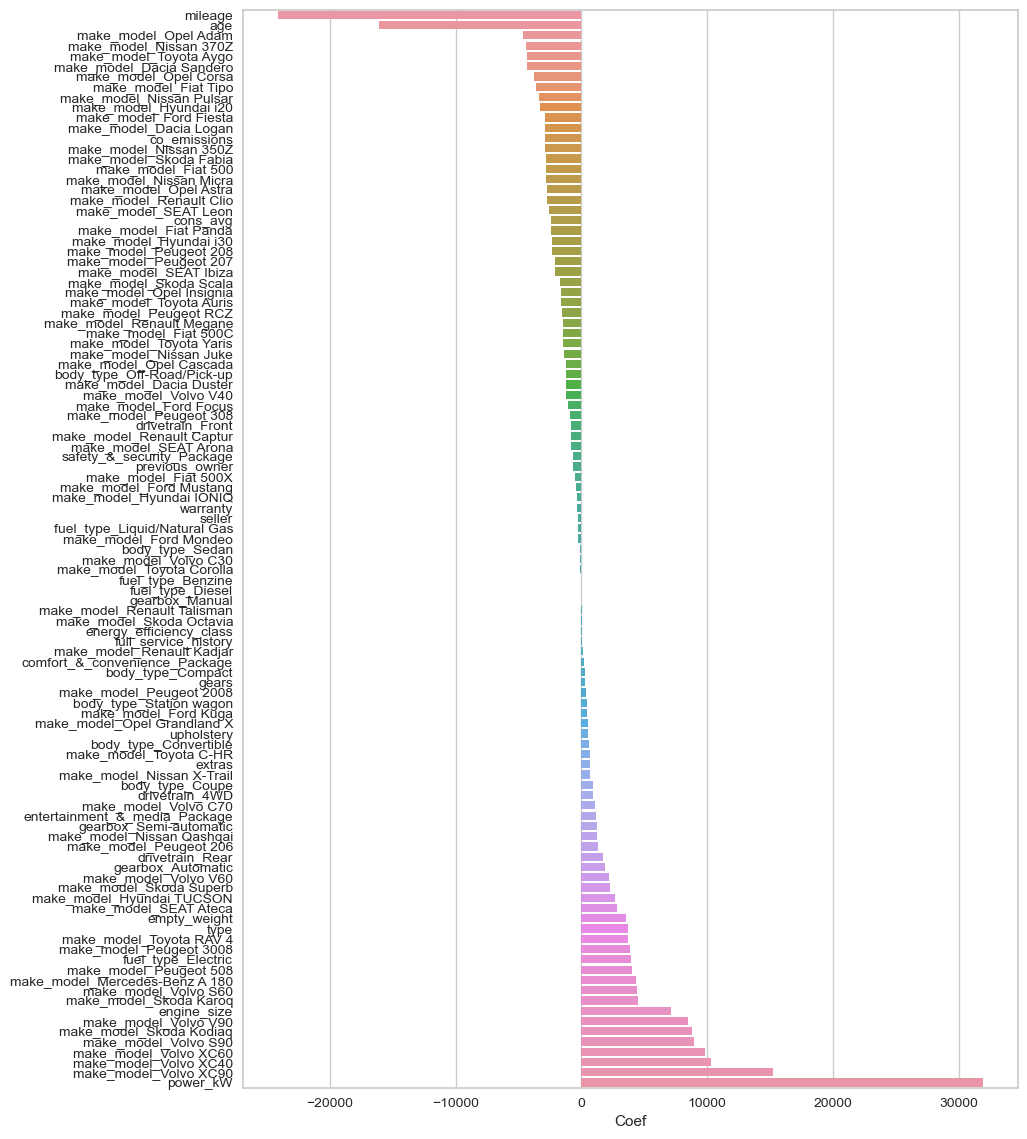

In [897]:
plt.figure(figsize=(10,14))
ax= sns.barplot(data= df_feat_imp, 
            x=df_feat_imp.Coef, 
            y=df_feat_imp.index)

In [898]:
lasso_grid_model.best_estimator_["Lasso"]

Lasso(alpha=0.001)

In [899]:
df_new = df[["make_model", "power_kW", "mileage","age", "engine_size", "type", "price"]]

In [900]:
df_new

,make_model,power_kW,mileage,age,engine_size,type,price
0,Mercedes-Benz A 180,85.000,27150.000,2.000,1461.000,Used,24400.000
1,Mercedes-Benz A 180,80.000,157500.000,12.000,1991.000,Used,7450.000
2,Mercedes-Benz A 180,85.000,21734.000,2.000,1461.000,Used,29800.000
3,Mercedes-Benz A 180,80.000,172700.000,4.000,1461.000,Used,21000.000
4,Mercedes-Benz A 180,85.000,18989.000,2.000,1461.000,Used,26800.000
...,...,...,...,...,...,...,...
18192,Volvo V40,88.000,114000.000,4.000,1969.000,Used,13000.000
18193,Volvo S60,154.000,166512.000,18.000,2521.000,Used,4999.000
18194,Volvo S90,288.000,40345.000,3.000,1969.000,Used,37600.000
18195,Volvo C30,84.000,96000.000,11.000,1560.000,Used,7300.000


In [901]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [902]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [903]:
cat_onehot = ['make_model']
cat_ordinal = ['type']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
                                       (OrdinalEncoder(categories= [cat_for_type]), cat_ordinal),
                                        remainder='passthrough', 
                                        verbose_feature_names_out=False) 

In [904]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso(alpha=0.001))]

lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)
train_val(lasso_final_model, X_train, y_train, X_test, y_test)

C:\Users\Esra\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.604e+09, tolerance: 1.874e+08
  model = cd_fast.enet_coordinate_descent(


,train,test
R2,0.876,0.871
mae,2761.477,2768.695
mse,15995381.754,16333803.130
rmse,3999.423,4041.510


## Cross Validate

In [905]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso(alpha=0.001))]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10, 
                        return_train_score=True)

C:\Users\Esra\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.511e+09, tolerance: 1.665e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Esra\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.514e+09, tolerance: 1.702e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Esra\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.787e+09, tolerance: 

In [906]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.875
train_r2                                           0.876
test_neg_mean_absolute_error                   -2779.759
train_neg_mean_absolute_error                  -2760.677
test_neg_mean_squared_error                -16230128.000
train_neg_mean_squared_error               -15983127.340
test_neg_root_mean_squared_error               -4021.085
train_neg_root_mean_squared_error              -3997.789
test_neg_mean_absolute_percentage_error           -0.201
train_neg_mean_absolute_percentage_error          -0.200
dtype: float64

In [907]:
y_pred = lasso_final_model.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = mean_squared_error(y_test, y_pred, squared=False)
fm_mape= mean_absolute_percentage_error(y_test, y_pred)

C:\Users\Esra\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 7. Visually Compare Models Performance In a Graph

In [908]:
compare = pd.DataFrame({"Model": ["linear_m","ridge_m", "lasso_m", "elastic_m", "final_m"],
                        "r2_score": [lm_R2, rm_R2, lasm_R2, em_R2, fm_R2],
                        "mae": [lm_mae, rm_mae, lasm_mae, em_mae, fm_mae],
                        "rmse": [lm_rmse, rm_rmse, lasm_rmse, em_rmse, fm_rmse],
                        "mape": [lm_mape, rm_mape, lasm_mape, em_mape, fm_mape]})
compare

,Model,r2_score,mae,rmse,mape
0,linear_m,0.886,2593.747,3800.630,0.197
1,ridge_m,0.886,2590.669,3799.322,0.196
2,lasso_m,0.886,2593.257,3799.730,0.197
3,elastic_m,0.886,2593.382,3801.839,0.197
4,final_m,0.871,2768.695,4041.510,0.209


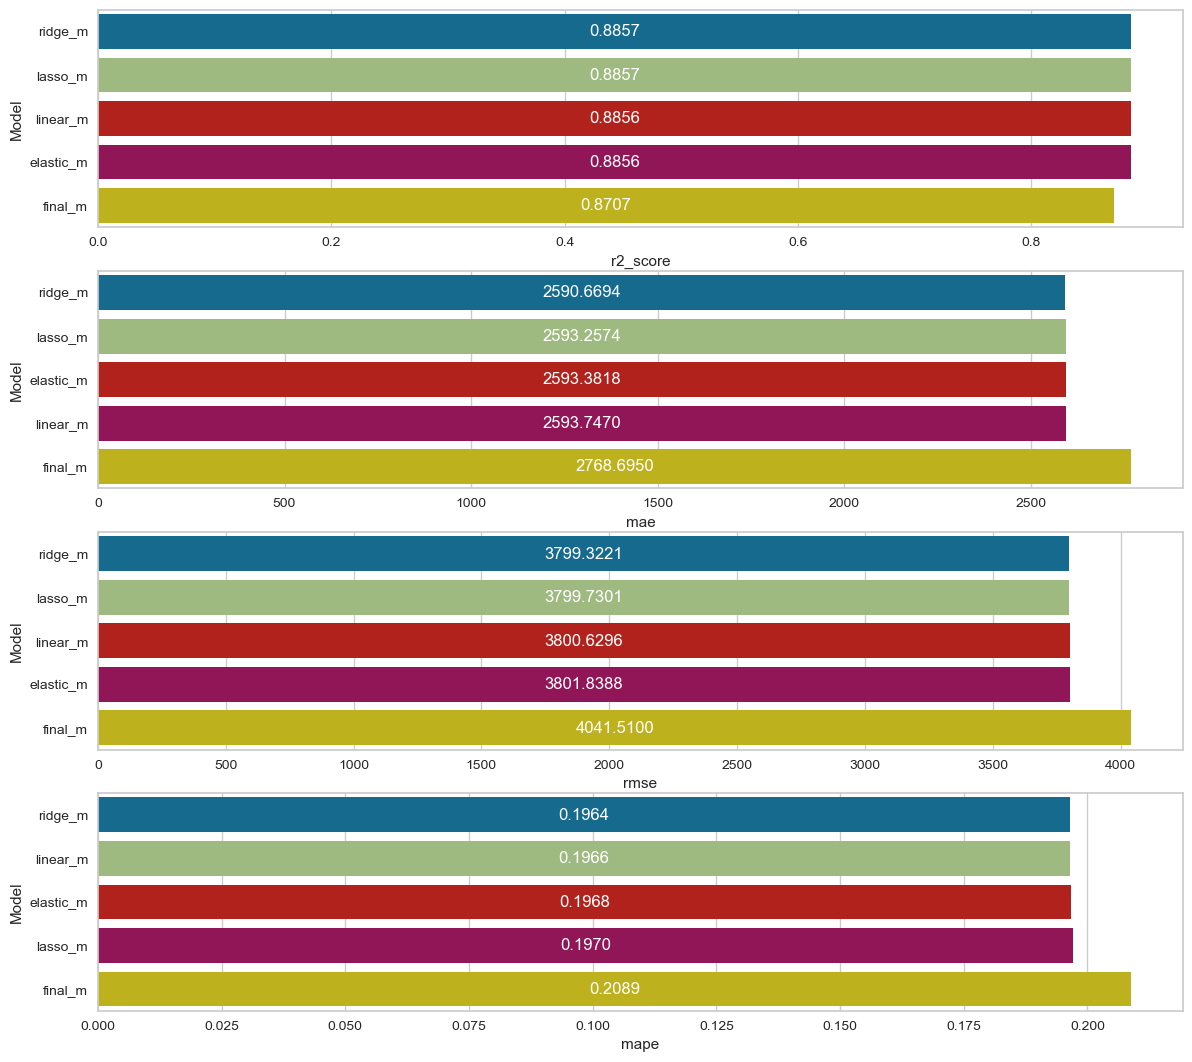

In [909]:
plt.figure(figsize=(14,13))

plt.subplot(411)
compare = compare.sort_values(by="r2_score", ascending=False)
ax=sns.barplot(x="r2_score", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(412)
compare = compare.sort_values(by="mae", ascending=True)
ax=sns.barplot(x="mae", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(413)
compare = compare.sort_values(by="rmse", ascending=True)
ax=sns.barplot(x="rmse", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(414)
compare = compare.sort_values(by="mape", ascending=True)
ax=sns.barplot(x="mape", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")
plt.show();

## Prediction a new observation
- Create an observation and predict its price

In [910]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [911]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso(alpha=0.001))]
final_model = Pipeline(steps=operations)

In [912]:
final_model.fit(X, y)

C:\Users\Esra\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.106e+09, tolerance: 2.332e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Esra\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=0.001))])

In [913]:
my_dict = {
    "make_model": 'Mercedes-Benz A 180',
    "power_kW": 85,
    "mileage": 30000,
    "age": 3,
    "engine_size": 1461,
    "type": "Used"
}

In [914]:
new_obs = pd.DataFrame([my_dict])
new_obs

,make_model,power_kW,mileage,age,engine_size,type
0,Mercedes-Benz A 180,85,30000,3,1461,Used


In [757]:
final_model.predict(new_obs)

array([26118.1242649])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___